<a href="https://colab.research.google.com/github/ifadly/Coursera_Capstone/blob/master/Traffic_Accidents_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Severity classification of traffic accidents in the UK
## Applied data science capstone project

### Import libraries

In [110]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

import itertools
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### Load dataset
Source: https://www.kaggle.com/tsiaras/uk-road-safety-accidents-and-vehicles

In [111]:
dataframe = pd.read_csv(r'/content/Accident_Information.csv')
dataframe.shape

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2047256, 34)

### Exploring the dataset

In [112]:
dataframe.head()

,Accident_Index,1st_Road_Class,1st_Road_Number,2nd_Road_Class,2nd_Road_Number,Accident_Severity,Carriageway_Hazards,Date,Day_of_Week,Did_Police_Officer_Attend_Scene_of_Accident,Junction_Control,Junction_Detail,Latitude,Light_Conditions,Local_Authority_(District),Local_Authority_(Highway),Location_Easting_OSGR,Location_Northing_OSGR,Longitude,LSOA_of_Accident_Location,Number_of_Casualties,Number_of_Vehicles,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Police_Force,Road_Surface_Conditions,Road_Type,Special_Conditions_at_Site,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Year,InScotland
0,200501BS00001,A,3218.0,NaN,0.0,Serious,None,2005-01-04,Tuesday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.489096,Daylight,Kensington and Chelsea,Kensington and Chelsea,525680.0,178240.0,-0.191170,E01002849,1,1,0.0,1.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,17:42,Urban,Raining no high winds,2005,No
1,200501BS00002,B,450.0,C,0.0,Slight,None,2005-01-05,Wednesday,1.0,Auto traffic signal,Crossroads,51.520075,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524170.0,181650.0,-0.211708,E01002909,1,1,0.0,5.0,Metropolitan Police,Dry,Dual carriageway,None,30.0,17:36,Urban,Fine no high winds,2005,No
2,200501BS00003,C,0.0,NaN,0.0,Slight,None,2005-01-06,Thursday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.525301,Darkness - lights lit,Kensington and Chelsea,Kensington and Chelsea,524520.0,182240.0,-0.206458,E01002857,1,2,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,00:15,Urban,Fine no high winds,2005,No
3,200501BS00004,A,3220.0,NaN,0.0,Slight,None,2005-01-07,Friday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.482442,Daylight,Kensington and Chelsea,Kensington and Chelsea,526900.0,177530.0,-0.173862,E01002840,1,1,0.0,0.0,Metropolitan Police,Dry,Single carriageway,None,30.0,10:35,Urban,Fine no high winds,2005,No
4,200501BS00005,Unclassified,0.0,NaN,0.0,Slight,None,2005-01-10,Monday,1.0,Data missing or out of range,Not at junction or within 20 metres,51.495752,Darkness - lighting unknown,Kensington and Chelsea,Kensington and Chelsea,528060.0,179040.0,-0.156618,E01002863,1,1,0.0,0.0,Metropolitan Police,Wet or damp,Single carriageway,None,30.0,21:13,Urban,Fine no high winds,2005,No


The data set contains 2,047,256 recorded accidents (rows) and 34 attributes (columns).
Below is a list of attributes;

In [113]:
for i, col in enumerate(dataframe.columns):
    print(i+1, '-', col)

1 - Accident_Index
2 - 1st_Road_Class
3 - 1st_Road_Number
4 - 2nd_Road_Class
5 - 2nd_Road_Number
6 - Accident_Severity
7 - Carriageway_Hazards
8 - Date
9 - Day_of_Week
10 - Did_Police_Officer_Attend_Scene_of_Accident
11 - Junction_Control
12 - Junction_Detail
13 - Latitude
14 - Light_Conditions
15 - Local_Authority_(District)
16 - Local_Authority_(Highway)
17 - Location_Easting_OSGR
18 - Location_Northing_OSGR
19 - Longitude
20 - LSOA_of_Accident_Location
21 - Number_of_Casualties
22 - Number_of_Vehicles
23 - Pedestrian_Crossing-Human_Control
24 - Pedestrian_Crossing-Physical_Facilities
25 - Police_Force
26 - Road_Surface_Conditions
27 - Road_Type
28 - Special_Conditions_at_Site
29 - Speed_limit
30 - Time
31 - Urban_or_Rural_Area
32 - Weather_Conditions
33 - Year
34 - InScotland


In [114]:
# For the purpose of this project, we will take a 5% sample of the 2,047,256 recorded accidents (rows) to reduce processing requierments.
df=dataframe.sample(frac = 0.05)
df.shape

(102363, 34)

Data type for each column

In [115]:
df.dtypes

Accident_Index                                  object
1st_Road_Class                                  object
1st_Road_Number                                float64
2nd_Road_Class                                  object
2nd_Road_Number                                float64
Accident_Severity                               object
Carriageway_Hazards                             object
Date                                            object
Day_of_Week                                     object
Did_Police_Officer_Attend_Scene_of_Accident    float64
Junction_Control                                object
Junction_Detail                                 object
Latitude                                       float64
Light_Conditions                                object
Local_Authority_(District)                      object
Local_Authority_(Highway)                       object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude 

Columns with missing data

In [116]:
df.isnull().sum()

Accident_Index                                     0
1st_Road_Class                                     0
1st_Road_Number                                    0
2nd_Road_Class                                 42104
2nd_Road_Number                                  856
Accident_Severity                                  0
Carriageway_Hazards                                0
Date                                               0
Day_of_Week                                        0
Did_Police_Officer_Attend_Scene_of_Accident       12
Junction_Control                                   0
Junction_Detail                                    0
Latitude                                           9
Light_Conditions                                   0
Local_Authority_(District)                         0
Local_Authority_(Highway)                          0
Location_Easting_OSGR                              9
Location_Northing_OSGR                             9
Longitude                                     

A quick look at the distribution of some attributes.

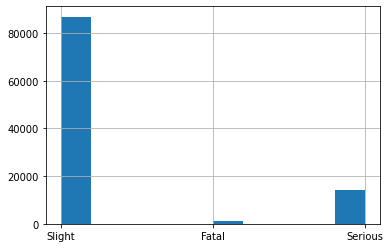

In [117]:
df.Accident_Severity.hist()

The dataset is obviously imbalanced...

In [118]:
df.Accident_Severity.value_counts(normalize=True)

Slight     0.848881
Serious    0.138419
Fatal      0.012700
Name: Accident_Severity, dtype: float64

In [119]:
df.Carriageway_Hazards.value_counts(normalize=True)

None                                               0.980735
Other object on road                               0.007434
Any animal in carriageway (except ridden horse)    0.005324
Pedestrian in carriageway - not injured            0.002286
Previous accident                                  0.001553
Data missing or out of range                       0.001475
Vehicle load on road                               0.001192
Name: Carriageway_Hazards, dtype: float64

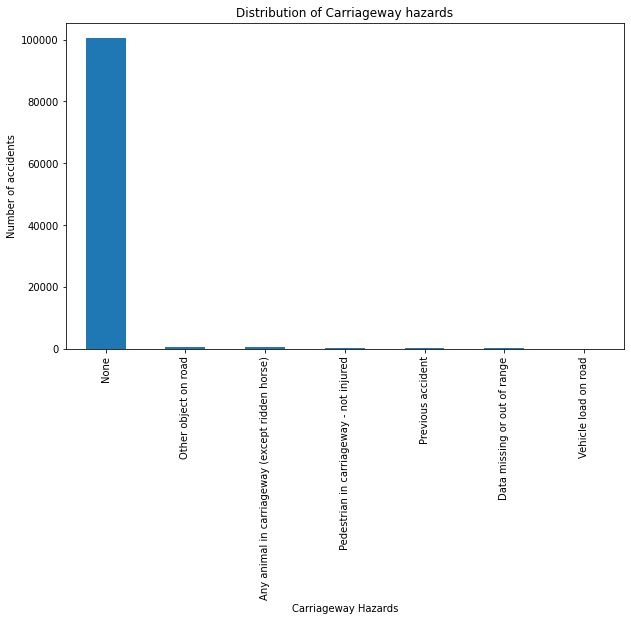

In [120]:

df.Carriageway_Hazards.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Carriageway Hazards')
plt.ylabel('Number of accidents')
plt.title('Distribution of Carriageway hazards')
plt.show()

Carriageway Hazards does not seem to be a contributing factor towards "Accident Severity" as 98% of accidents happened in the absence of any hazards.

Friday       0.163350
Tuesday      0.151705
Wednesday    0.151256
Thursday     0.147983
Monday       0.140422
Saturday     0.133349
Sunday       0.111935
Name: Day_of_Week, dtype: float64


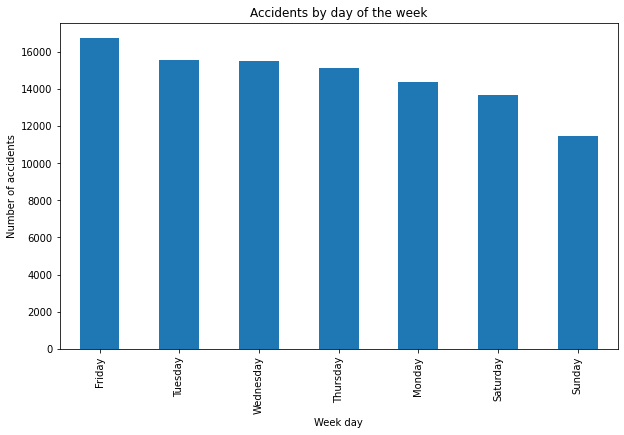

In [121]:
print(df.Day_of_Week.value_counts(normalize=True))
df.Day_of_Week.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Week day')
plt.ylabel('Number of accidents')
plt.title('Accidents by day of the week')
plt.show()


Friday has the highst share of accidents, with Sunday being the least

Give way or uncontrolled               0.483094
Data missing or out of range           0.368092
Auto traffic signal                    0.103553
Not at junction or within 20 metres    0.037338
Stop sign                              0.006047
Authorised person                      0.001876
Name: Junction_Control, dtype: float64


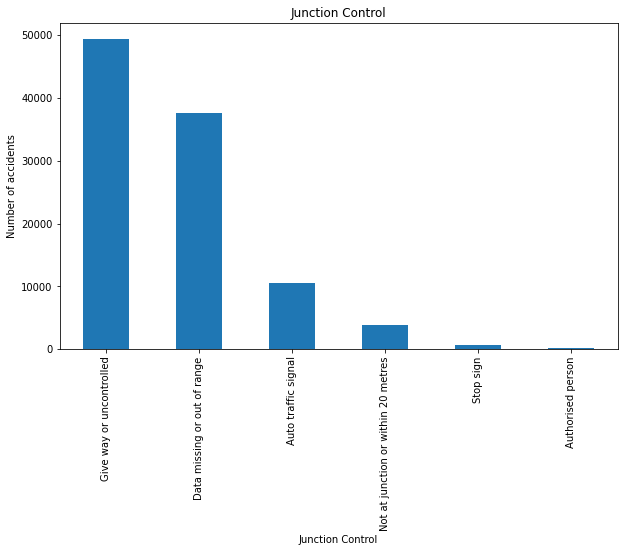

In [122]:
print(df.Junction_Control.value_counts(normalize=True))
df.Junction_Control.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Junction Control')
plt.ylabel('Number of accidents')
plt.title('Junction Control')
plt.show()

Around 37% of Junction Control data is missing

Not at junction or within 20 metres    0.403329
T or staggered junction                0.311275
Crossroads                             0.096226
Roundabout                             0.086731
Private drive or entrance              0.034925
Other junction                         0.029053
Slip road                              0.014634
More than 4 arms (not roundabout)      0.012368
Mini-roundabout                        0.011078
Data missing or out of range           0.000381
Name: Junction_Detail, dtype: float64


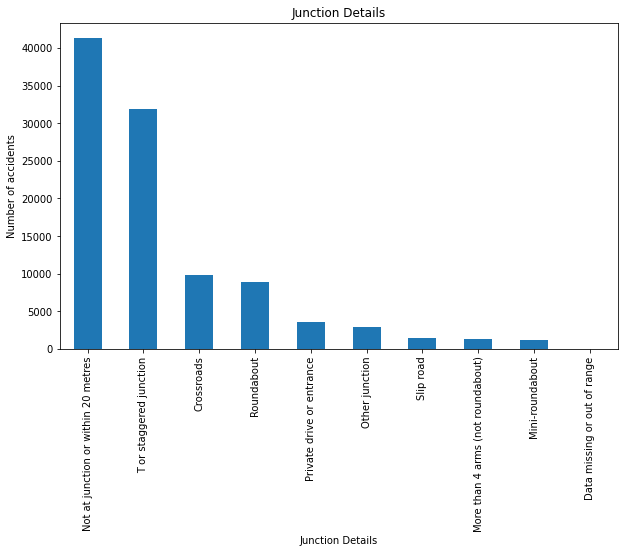

In [123]:

print(df.Junction_Detail.value_counts(normalize=True))
df.Junction_Detail.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Junction Details')
plt.ylabel('Number of accidents')
plt.title('Junction Details')
plt.show()

Fine no high winds              0.800572
Raining no high winds           0.117513
Other                           0.021199
Unknown                         0.020984
Raining + high winds            0.013706
Fine + high winds               0.012680
Snowing no high winds           0.006438
Fog or mist                     0.005725
Snowing + high winds            0.001094
Data missing or out of range    0.000088
Name: Weather_Conditions, dtype: float64


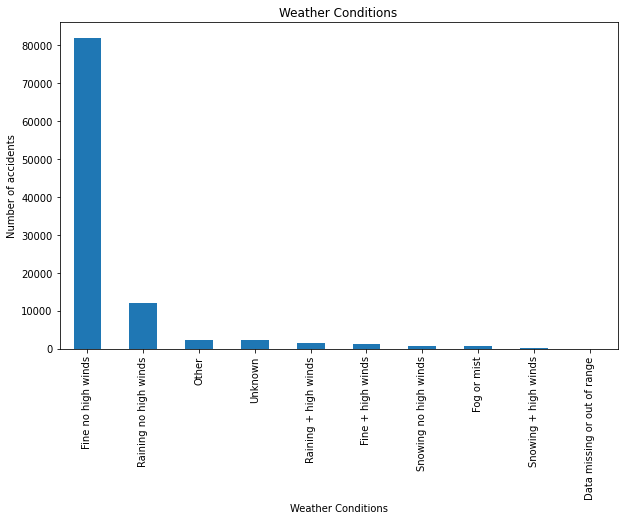

In [124]:
print(df.Weather_Conditions.value_counts(normalize=True))
df.Weather_Conditions.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Weather Conditions')
plt.ylabel('Number of accidents')
plt.title('Weather Conditions')
plt.show()

80% of recorded accidents occured in good weather, and almost 12% during times of high wind with no rain 

None                                          0.975157
Roadworks                                     0.010951
Oil or diesel                                 0.003351
Mud                                           0.003087
Road surface defective                        0.002335
Auto traffic signal - out                     0.001876
Road sign or marking defective or obscured    0.001426
Data missing or out of range                  0.001397
Auto signal part defective                    0.000420
Name: Special_Conditions_at_Site, dtype: float64


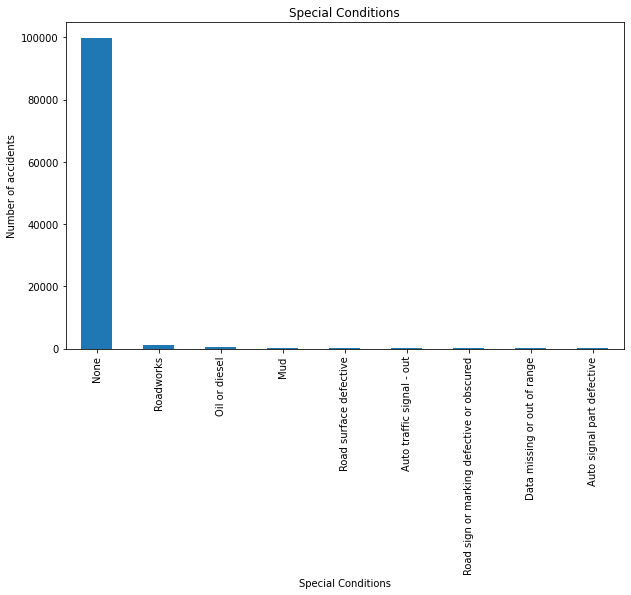

In [125]:
print(df.Special_Conditions_at_Site.value_counts(normalize=True))
df.Special_Conditions_at_Site.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Special Conditions')
plt.ylabel('Number of accidents')
plt.title('Special Conditions')
plt.show()

More than 97% of accidents took place in normal conditions (absence of oil spils, roadworks, defects in road surface, etc.)

Urban          0.644881
Rural          0.355031
Unallocated    0.000088
Name: Urban_or_Rural_Area, dtype: float64


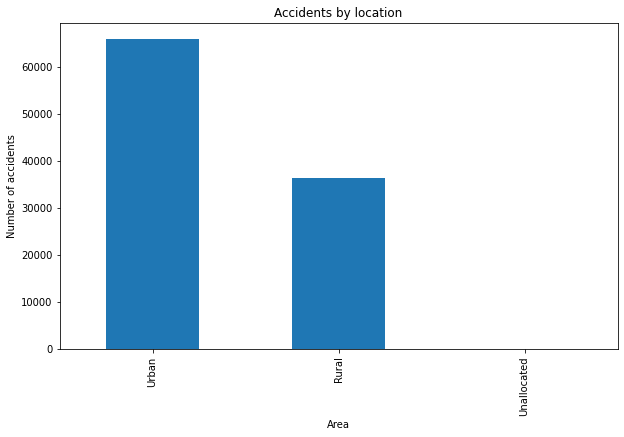

In [126]:
print(df.Urban_or_Rural_Area.value_counts(normalize=True))
df.Urban_or_Rural_Area.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Area')
plt.ylabel('Number of accidents')
plt.title('Accidents by location')
plt.show()

Almost 65% of recorded accidents took place in urban areas, and around 35% in rural areas. 

Daylight                       0.730176
Darkness - lights lit          0.196546
Darkness - no lighting         0.055606
Darkness - lighting unknown    0.012817
Darkness - lights unlit        0.004855
Name: Light_Conditions, dtype: float64


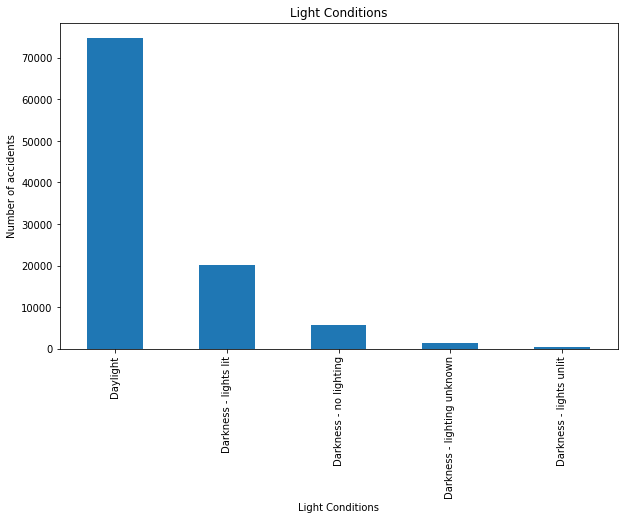

In [127]:
print(df.Light_Conditions.value_counts(normalize=True))
df.Light_Conditions.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Light Conditions')
plt.ylabel('Number of accidents')
plt.title('Light Conditions')
plt.show()

73% of accidents took place in day light, with almost 26% taking place under darkness or limited/artificial lighting

### Data cleaning and wrangling

### Assumptions:

Since the objective of this project is to predict the severity of an accident, represented in column "5" in 3 categories, namely (Slight, Serious and Fatal).
The following are a set of assumptions made to serve the objective and simplify the dataset.

A. Some attributes are assumed to have impact on accident severity, thus, a dataframe will be created using the following attributes;


    - Accident_Severity
    - Date
    - Day_of_Week
    - Junction_Control
    - Junction_Detail
    - Light_Conditions
    - Road_Surface_Conditions
    - Road_Type
    - Speed_limit
    - Urban_or_Rural_Area
    - Weather_Conditions


B. Light condition will be used to determine the time of the day (Day or Night)  
    

In [128]:
accidents_df=df[['Accident_Severity','Date','Day_of_Week','Junction_Control','Junction_Detail','Light_Conditions','Road_Surface_Conditions','Road_Type','Speed_limit','Urban_or_Rural_Area','Weather_Conditions']]
print(accidents_df.shape)
accidents_df.head()

(102363, 11)


,Accident_Severity,Date,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions
601887,Slight,2008-01-21,Monday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds
674910,Slight,2008-05-09,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,Daylight,Dry,Single carriageway,60.0,Rural,Fine no high winds
963623,Slight,2010-11-16,Tuesday,Give way or uncontrolled,T or staggered junction,Daylight,Dry,Single carriageway,30.0,Rural,Fine no high winds
654829,Slight,2008-11-25,Tuesday,Give way or uncontrolled,Crossroads,Daylight,Dry,Single carriageway,30.0,Urban,Fine no high winds
1464663,Slight,2013-02-19,Tuesday,Give way or uncontrolled,Private drive or entrance,Daylight,Dry,Single carriageway,40.0,Rural,Fine no high winds


The number of attributes is now reduced to 11.
Since we have abundance of records, lets remove all rows with missing data

In [129]:
# First we will replace all occurances of 'Data missing or out of range', 'Unallocated' or 'Unknown' with NaN
accidents_df.replace(to_replace=['Data missing or out of range'], value=np.nan, inplace=True)
accidents_df.replace(to_replace=['Unknown'], value=np.nan, inplace=True)
accidents_df.replace(to_replace=['Unallocated'], value=np.nan, inplace=True)

# How many missing values do we have?
accidents_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4384: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


Accident_Severity              0
Date                           0
Day_of_Week                    0
Junction_Control           37679
Junction_Detail               39
Light_Conditions               0
Road_Surface_Conditions      300
Road_Type                    739
Speed_limit                    2
Urban_or_Rural_Area            9
Weather_Conditions          2157
dtype: int64

In [130]:
# Next we drop all rows containing NaN values
accidents_df.dropna (axis = 0, inplace = True)

# Check to confirm all missing data has been removed
accidents_df.isnull().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Accident_Severity          0
Date                       0
Day_of_Week                0
Junction_Control           0
Junction_Detail            0
Light_Conditions           0
Road_Surface_Conditions    0
Road_Type                  0
Speed_limit                0
Urban_or_Rural_Area        0
Weather_Conditions         0
dtype: int64

In [131]:
# Now we have a data frame with around 63 thousand records
accidents_df.shape

(63036, 11)

In [132]:
# How are the data types like?
accidents_df.dtypes

Accident_Severity           object
Date                        object
Day_of_Week                 object
Junction_Control            object
Junction_Detail             object
Light_Conditions            object
Road_Surface_Conditions     object
Road_Type                   object
Speed_limit                float64
Urban_or_Rural_Area         object
Weather_Conditions          object
dtype: object

In [133]:
# We need to fix the date and time data type
accidents_df['Date'] = pd.to_datetime(accidents_df.Date)

accidents_df.dtypes

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Accident_Severity                  object
Date                       datetime64[ns]
Day_of_Week                        object
Junction_Control                   object
Junction_Detail                    object
Light_Conditions                   object
Road_Surface_Conditions            object
Road_Type                          object
Speed_limit                       float64
Urban_or_Rural_Area                object
Weather_Conditions                 object
dtype: object

In [134]:
# Extract month and year from Date
accidents_df['year'] = accidents_df['Date'].dt.year
accidents_df['month'] = accidents_df['Date'].dt.month

# Then drop the Date column
accidents_df.drop(['Date'], axis = 1, inplace=True)

accidents_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,year,month
601887,Slight,Monday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds,2008,1
674910,Slight,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,Daylight,Dry,Single carriageway,60.0,Rural,Fine no high winds,2008,5
963623,Slight,Tuesday,Give way or uncontrolled,T or staggered junction,Daylight,Dry,Single carriageway,30.0,Rural,Fine no high winds,2010,11
654829,Slight,Tuesday,Give way or uncontrolled,Crossroads,Daylight,Dry,Single carriageway,30.0,Urban,Fine no high winds,2008,11
1464663,Slight,Tuesday,Give way or uncontrolled,Private drive or entrance,Daylight,Dry,Single carriageway,40.0,Rural,Fine no high winds,2013,2


11    0.092090
10    0.090662
7     0.088299
9     0.087188
5     0.086871
6     0.084634
8     0.081906
1     0.080287
12    0.079827
3     0.079050
4     0.076797
2     0.072387
Name: month, dtype: float64


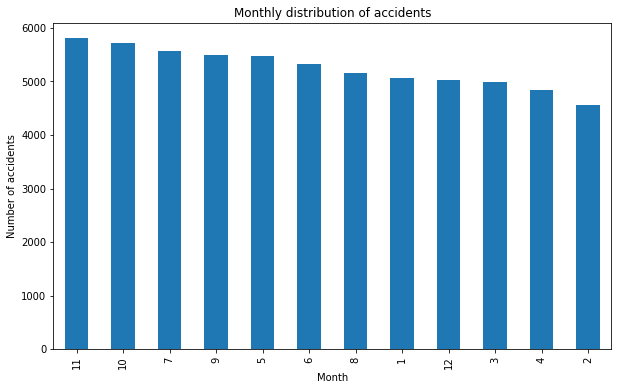

In [135]:
print(accidents_df.month.value_counts(normalize=True))
accidents_df.month.value_counts().plot(kind='bar', figsize=(10, 6))
    
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.title('Monthly distribution of accidents')
plt.show()

In [136]:
accidents_df.shape

(63036, 12)

Accident_Severity  Accident_Severity
Fatal              Fatal                1.0
Serious            Serious              1.0
Slight             Slight               1.0
Name: Accident_Severity, dtype: float64




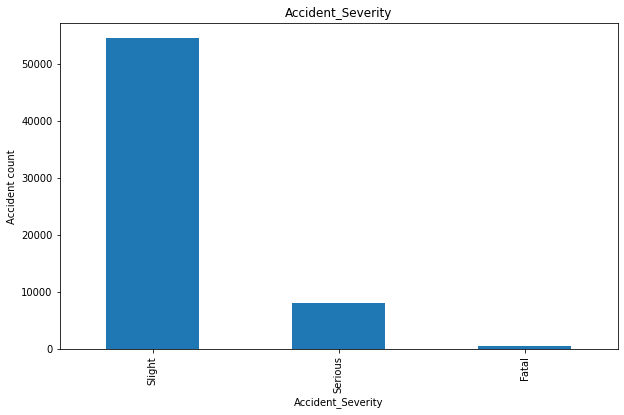

Accident_Severity  Day_of_Week
Fatal              Sunday         0.166972
                   Saturday       0.150459
                   Wednesday      0.150459
                   Friday         0.143119
                   Monday         0.139450
                   Tuesday        0.132110
                   Thursday       0.117431
Serious            Friday         0.160712
                   Tuesday        0.152564
                   Thursday       0.145418
                   Wednesday      0.140654
                   Monday         0.138523
                   Saturday       0.138523
                   Sunday         0.123605
Slight             Friday         0.164545
                   Wednesday      0.157299
                   Tuesday        0.155942
                   Thursday       0.150732
                   Monday         0.140936
                   Saturday       0.128132
                   Sunday         0.102414
Name: Day_of_Week, dtype: float64




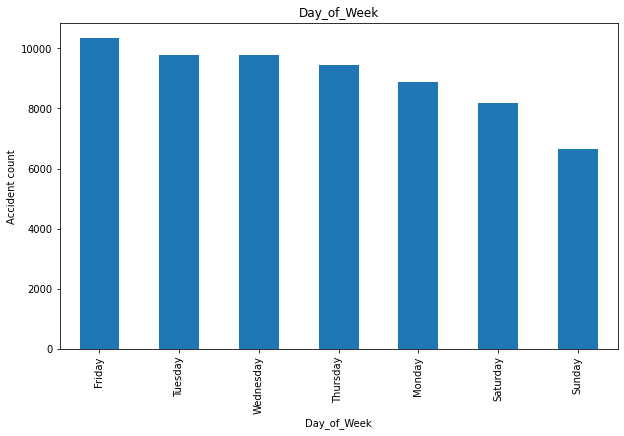

Accident_Severity  Junction_Control                   
Fatal              Give way or uncontrolled               0.688073
                   Not at junction or within 20 metres    0.174312
                   Auto traffic signal                    0.119266
                   Stop sign                              0.014679
                   Authorised person                      0.003670
Serious            Give way or uncontrolled               0.777987
                   Auto traffic signal                    0.141030
                   Not at junction or within 20 metres    0.069199
                   Stop sign                              0.008148
                   Authorised person                      0.003635
Slight             Give way or uncontrolled               0.763107
                   Auto traffic signal                    0.167755
                   Not at junction or within 20 metres    0.056536
                   Stop sign                              0.009796
       

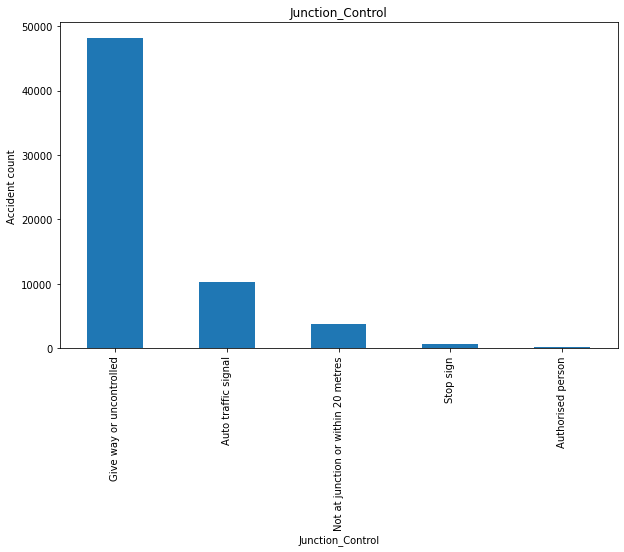

Accident_Severity  Junction_Detail                    
Fatal              T or staggered junction                0.486239
                   Not at junction or within 20 metres    0.174312
                   Crossroads                             0.133945
                   Private drive or entrance              0.058716
                   Other junction                         0.047706
                   Roundabout                             0.044037
                   Slip road                              0.036697
                   More than 4 arms (not roundabout)      0.014679
                   Mini-roundabout                        0.003670
Serious            T or staggered junction                0.528896
                   Crossroads                             0.143287
                   Roundabout                             0.099035
                   Not at junction or within 20 metres    0.069199
                   Private drive or entrance              0.061176
       

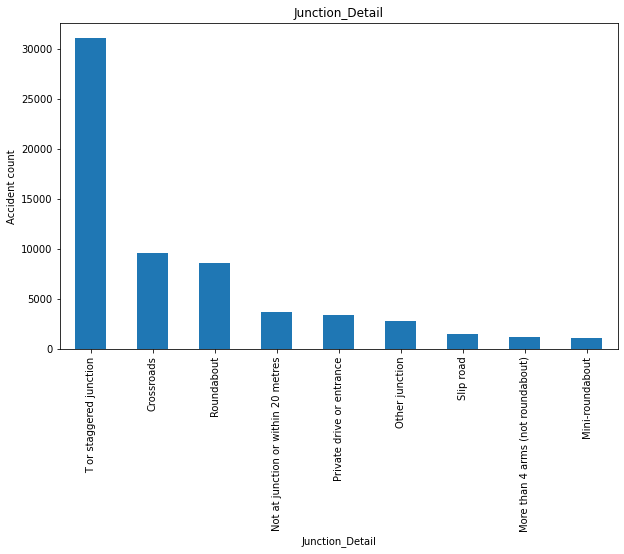

Accident_Severity  Light_Conditions           
Fatal              Daylight                       0.616514
                   Darkness - lights lit          0.247706
                   Darkness - no lighting         0.110092
                   Darkness - lighting unknown    0.012844
                   Darkness - lights unlit        0.012844
Serious            Daylight                       0.707409
                   Darkness - lights lit          0.235678
                   Darkness - no lighting         0.042497
                   Darkness - lighting unknown    0.008274
                   Darkness - lights unlit        0.006143
Slight             Daylight                       0.746579
                   Darkness - lights lit          0.214459
                   Darkness - no lighting         0.025094
                   Darkness - lighting unknown    0.009759
                   Darkness - lights unlit        0.004109
Name: Light_Conditions, dtype: float64




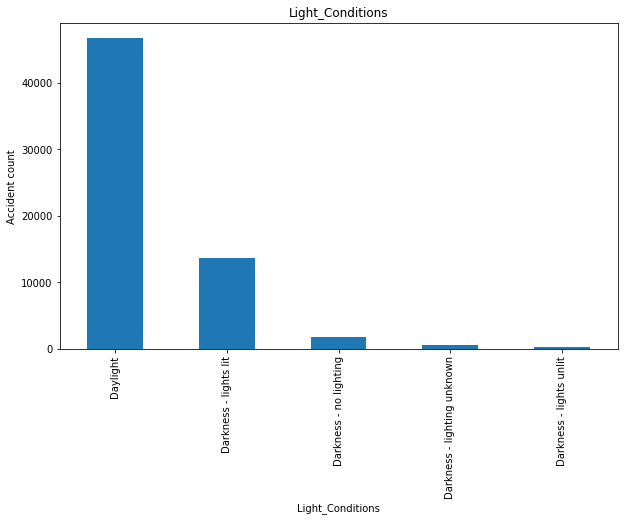

Accident_Severity  Road_Surface_Conditions
Fatal              Dry                        0.684404
                   Wet or damp                0.297248
                   Frost or ice               0.016514
                   Flood over 3cm. deep       0.001835
Serious            Dry                        0.727843
                   Wet or damp                0.257490
                   Frost or ice               0.011909
                   Snow                       0.002131
                   Flood over 3cm. deep       0.000627
Slight             Dry                        0.705030
                   Wet or damp                0.275691
                   Frost or ice               0.014106
                   Snow                       0.004604
                   Flood over 3cm. deep       0.000569
Name: Road_Surface_Conditions, dtype: float64




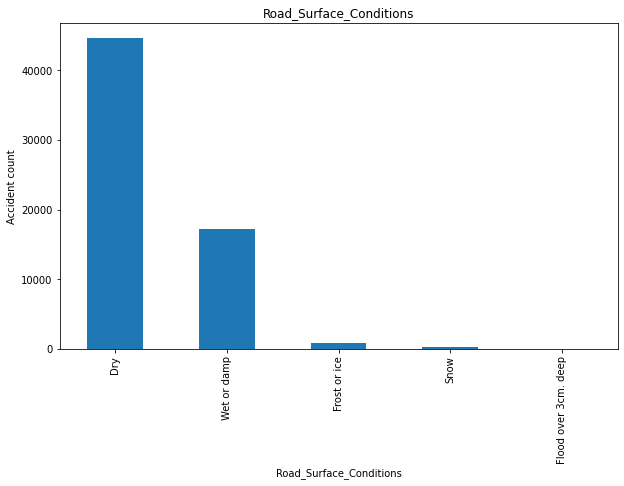

Accident_Severity  Road_Type         
Fatal              Single carriageway    0.770642
                   Dual carriageway      0.166972
                   Roundabout            0.040367
                   One way street        0.014679
                   Slip road             0.007339
Serious            Single carriageway    0.784380
                   Dual carriageway      0.105428
                   Roundabout            0.079604
                   One way street        0.022314
                   Slip road             0.008274
Slight             Single carriageway    0.741699
                   Dual carriageway      0.114723
                   Roundabout            0.109238
                   One way street        0.022141
                   Slip road             0.012199
Name: Road_Type, dtype: float64




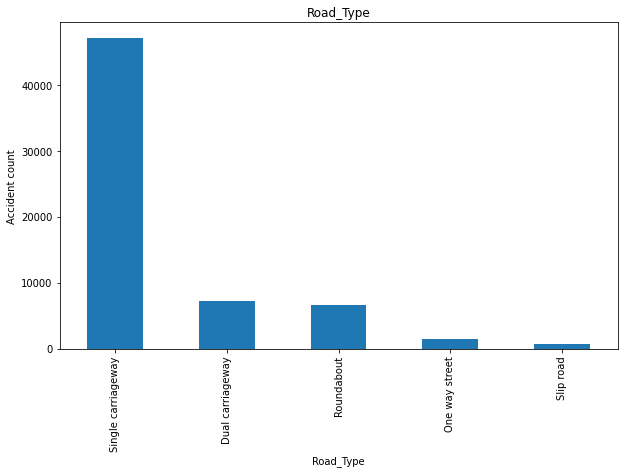

Accident_Severity  Speed_limit
Fatal              30.0           0.469725
                   60.0           0.258716
                   40.0           0.117431
                   70.0           0.091743
                   50.0           0.055046
                   20.0           0.007339
Serious            30.0           0.672809
                   60.0           0.147675
                   40.0           0.089633
                   70.0           0.039112
                   50.0           0.029585
                   20.0           0.021186
Slight             30.0           0.725795
                   60.0           0.101680
                   40.0           0.087555
                   70.0           0.038357
                   50.0           0.027571
                   20.0           0.019041
Name: Speed_limit, dtype: float64




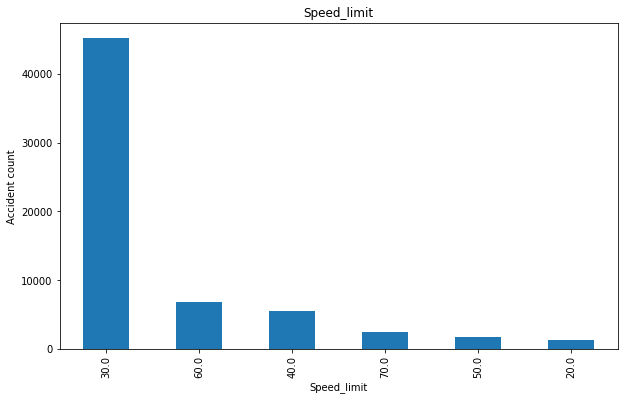

Accident_Severity  Urban_or_Rural_Area
Fatal              Rural                  0.524771
                   Urban                  0.475229
Serious            Urban                  0.682337
                   Rural                  0.317663
Slight             Urban                  0.739296
                   Rural                  0.260704
Name: Urban_or_Rural_Area, dtype: float64




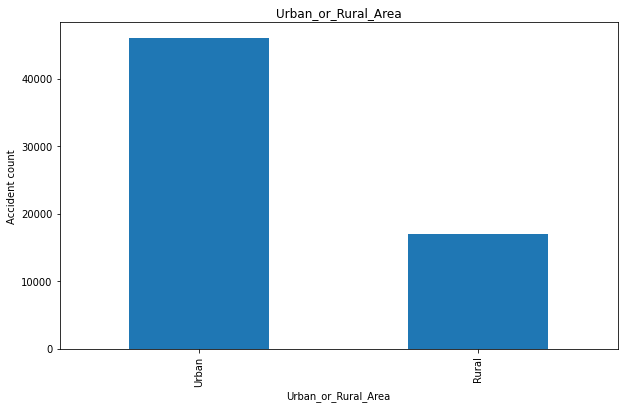

Accident_Severity  Weather_Conditions   
Fatal              Fine no high winds       0.860550
                   Raining no high winds    0.091743
                   Other                    0.014679
                   Raining + high winds     0.011009
                   Fine + high winds        0.009174
                   Fog or mist              0.009174
                   Snowing no high winds    0.003670
Serious            Fine no high winds       0.847186
                   Raining no high winds    0.105052
                   Other                    0.015419
                   Fine + high winds        0.012661
                   Raining + high winds     0.011784
                   Fog or mist              0.004262
                   Snowing no high winds    0.003009
                   Snowing + high winds     0.000627
Slight             Fine no high winds       0.822266
                   Raining no high winds    0.121015
                   Other                    0.020784
     

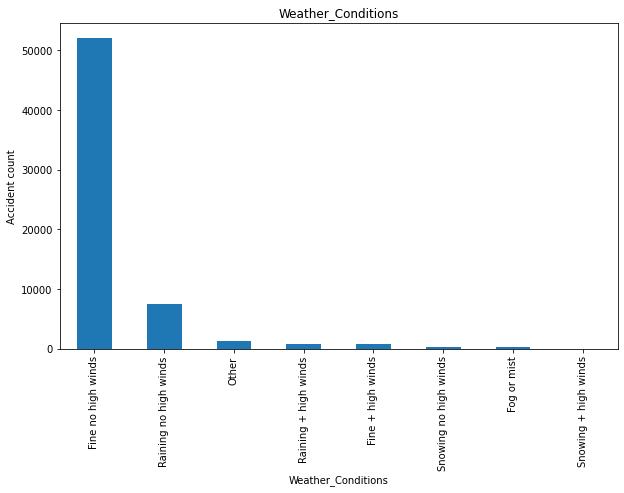

Accident_Severity  year
Fatal              2005    0.157798
                   2006    0.126606
                   2007    0.121101
                   2008    0.102752
                   2009    0.097248
                   2010    0.062385
                   2017    0.062385
                   2012    0.056881
                   2014    0.047706
                   2011    0.045872
                   2016    0.042202
                   2013    0.040367
                   2015    0.036697
Serious            2008    0.093017
                   2007    0.090134
                   2006    0.087125
                   2005    0.084368
                   2009    0.079479
                   2017    0.078225
                   2012    0.075467
                   2014    0.071205
                   2010    0.070829
                   2016    0.069700
                   2011    0.068071
                   2015    0.066441
                   2013    0.065940
Slight             2005    0.098250
    

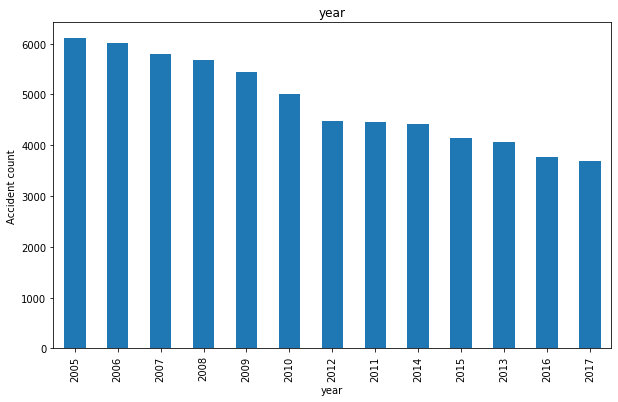

Accident_Severity  month
Fatal              10       0.097248
                   5        0.095413
                   9        0.093578
                   1        0.091743
                   4        0.086239
                   8        0.086239
                   3        0.082569
                   12       0.082569
                   7        0.078899
                   11       0.071560
                   6        0.067890
                   2        0.066055
Serious            7        0.094396
                   10       0.094146
                   11       0.093017
                   9        0.090886
                   6        0.089006
                   5        0.086749
                   8        0.084368
                   4        0.081610
                   3        0.073837
                   1        0.072208
                   12       0.071330
                   2        0.068447
Slight             11       0.092160
                   10       0.090087
             

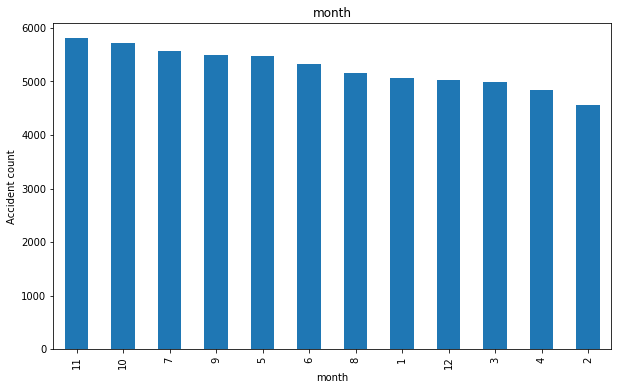

In [137]:
# A quick look on how the 1 attributes are distributed against Accident Severity
for i in accidents_df.columns:
    print(accidents_df.groupby('Accident_Severity')[i].value_counts(normalize=True))
    print('\n')
    df_plt=accidents_df[i].value_counts()
    df_plt.plot(kind='bar', figsize=(10, 6))
    
    plt.xlabel(i)
    plt.ylabel('Accident count')
    plt.title(i)
    plt.show()

In [138]:
accidents_df.head()

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,year,month
601887,Slight,Monday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,Wet or damp,Single carriageway,30.0,Urban,Raining no high winds,2008,1
674910,Slight,Friday,Not at junction or within 20 metres,Not at junction or within 20 metres,Daylight,Dry,Single carriageway,60.0,Rural,Fine no high winds,2008,5
963623,Slight,Tuesday,Give way or uncontrolled,T or staggered junction,Daylight,Dry,Single carriageway,30.0,Rural,Fine no high winds,2010,11
654829,Slight,Tuesday,Give way or uncontrolled,Crossroads,Daylight,Dry,Single carriageway,30.0,Urban,Fine no high winds,2008,11
1464663,Slight,Tuesday,Give way or uncontrolled,Private drive or entrance,Daylight,Dry,Single carriageway,40.0,Rural,Fine no high winds,2013,2


In [139]:
accidents_df.shape

(63036, 12)

As highlighted earlier, the dataset is imbalanced


In [140]:
df.Accident_Severity.value_counts(normalize=True)

Slight     0.848881
Serious    0.138419
Fatal      0.012700
Name: Accident_Severity, dtype: float64

We will carry out sampling compensation to have a balanced dataset for modelling

In [141]:
# Counts for each of the classes
class_Slightcount, class_Seriouscount, class_Fatalcount = accidents_df['Accident_Severity'].value_counts()
class_Slight = accidents_df[accidents_df['Accident_Severity'] == 'Slight']
class_Serious = accidents_df[accidents_df['Accident_Severity'] == 'Serious']
class_Fatal = accidents_df[accidents_df['Accident_Severity'] == 'Fatal']
print('class_Slight:', class_Slight.shape)
print('class_Serious:', class_Serious.shape)
print('class_Fatal:', class_Fatal.shape)

class_Slight: (54514, 12)
class_Serious: (7977, 12)
class_Fatal: (545, 12)


In [142]:
# take samples from Fatal and Slight that are equal in number to Serious
class_Fatal_over = class_Fatal.sample(class_Seriouscount, replace=True)
class_Slight_under = class_Slight.sample(class_Seriouscount, replace=True)

# merge into a balanced dataframe
df_bal = pd.concat([class_Fatal_over,class_Slight_under, class_Serious], axis=0)

print(df_bal.Accident_Severity.value_counts())
df_bal.head()

Slight     7977
Fatal      7977
Serious    7977
Name: Accident_Severity, dtype: int64


,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,year,month
2046236,Fatal,Sunday,Give way or uncontrolled,Crossroads,Daylight,Dry,Single carriageway,60.0,Rural,Fine no high winds,2017,8
263725,Fatal,Tuesday,Auto traffic signal,T or staggered junction,Darkness - lights lit,Dry,Dual carriageway,40.0,Urban,Fine no high winds,2006,10
1471612,Fatal,Wednesday,Give way or uncontrolled,T or staggered junction,Daylight,Dry,Single carriageway,30.0,Rural,Fine no high winds,2013,7
756835,Fatal,Tuesday,Give way or uncontrolled,T or staggered junction,Darkness - lights lit,Dry,Single carriageway,30.0,Urban,Fine no high winds,2009,10
1413156,Fatal,Thursday,Auto traffic signal,Crossroads,Darkness - lights lit,Dry,Single carriageway,30.0,Urban,Fine no high winds,2013,10


In [143]:
# Changing all darkness values into "Dark/Night" 

df_bal['Light_Conditions'].replace(to_replace=['Darkness - lights lit'], value='Dark/Night', inplace=True)
df_bal['Light_Conditions'].replace(to_replace=['Darkness - no lighting'], value='Dark/Night', inplace=True)
df_bal['Light_Conditions'].replace(to_replace=['Darkness - lighting unknown'], value='Dark/Night', inplace=True)
df_bal['Light_Conditions'].replace(to_replace=['Darkness - lights unlit'], value='Dark/Night', inplace=True)

df_bal.Light_Conditions.value_counts(normalize=True)

Daylight      0.690109
Dark/Night    0.309891
Name: Light_Conditions, dtype: float64

In [144]:
df_bal.shape

(23931, 12)

In [145]:
df_bal.head()

,Accident_Severity,Day_of_Week,Junction_Control,Junction_Detail,Light_Conditions,Road_Surface_Conditions,Road_Type,Speed_limit,Urban_or_Rural_Area,Weather_Conditions,year,month
2046236,Fatal,Sunday,Give way or uncontrolled,Crossroads,Daylight,Dry,Single carriageway,60.0,Rural,Fine no high winds,2017,8
263725,Fatal,Tuesday,Auto traffic signal,T or staggered junction,Dark/Night,Dry,Dual carriageway,40.0,Urban,Fine no high winds,2006,10
1471612,Fatal,Wednesday,Give way or uncontrolled,T or staggered junction,Daylight,Dry,Single carriageway,30.0,Rural,Fine no high winds,2013,7
756835,Fatal,Tuesday,Give way or uncontrolled,T or staggered junction,Dark/Night,Dry,Single carriageway,30.0,Urban,Fine no high winds,2009,10
1413156,Fatal,Thursday,Auto traffic signal,Crossroads,Dark/Night,Dry,Single carriageway,30.0,Urban,Fine no high winds,2013,10


### One Hot Encoding

In [146]:
severity = df_bal.Accident_Severity
Day = pd.get_dummies(df_bal["Day_of_Week"])
jc = pd.get_dummies(df_bal["Junction_Control"])
jd = pd.get_dummies(df_bal["Junction_Detail"])
light = pd.get_dummies(df_bal["Light_Conditions"])
surface = pd.get_dummies(df_bal["Road_Surface_Conditions"])
road = pd.get_dummies(df_bal["Road_Type"])
speed = pd.get_dummies(df_bal["Speed_limit"])
area = pd.get_dummies(df_bal["Urban_or_Rural_Area"])
weather = pd.get_dummies(df_bal["Weather_Conditions"])
month = pd.get_dummies(df_bal["month"])

# Creating a feature set
FeatureTable= pd.concat([severity,Day, jc, jd, light, surface, road, speed, area, weather, month],axis = 1, sort = False)
FeatureTable

,Accident_Severity,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Authorised person,Auto traffic signal,Give way or uncontrolled,Not at junction or within 20 metres,Stop sign,Crossroads,Mini-roundabout,More than 4 arms (not roundabout),Not at junction or within 20 metres,Other junction,Private drive or entrance,Roundabout,Slip road,T or staggered junction,Dark/Night,Daylight,Dry,Flood over 3cm. deep,Frost or ice,Snow,Wet or damp,Dual carriageway,One way street,Roundabout,Single carriageway,Slip road,20.0,30.0,40.0,50.0,60.0,70.0,Rural,Urban,Fine + high winds,Fine no high winds,Fog or mist,Other,Raining + high winds,Raining no high winds,Snowing + high winds,Snowing no high winds,1,2,3,4,5,6,7,8,9,10,11,12
2046236,Fatal,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
263725,Fatal,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1471612,Fatal,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
756835,Fatal,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1413156,Fatal,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2032404,Serious,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1362173,Serious,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
940885,Serious,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1049072,Serious,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


## Modelling

In [147]:
# To be used for model evaluation
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [148]:
# Create sets for dependant and independant sets 
X = pd.concat([Day, jc, jd, light, surface, road, speed, area, weather, month],axis = 1, sort = False)
y = df_bal['Accident_Severity'].values

In [149]:
# Create sets for test and training sets 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (16751, 61) (16751,)
Test set: (7180, 61) (7180,)


# SVM

In [150]:
from sklearn import svm
acc_svm = svm.SVC(kernel='rbf')
acc_svm.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
yhat = acc_svm.predict(X_test)
print('sample of predicted values',yhat[0:10])
print('corresponding actual values',y_test[0:10])

sample of predicted values ['Serious' 'Fatal' 'Fatal' 'Fatal' 'Slight' 'Slight' 'Slight' 'Fatal'
 'Fatal' 'Fatal']
corresponding actual values ['Serious' 'Slight' 'Fatal' 'Slight' 'Slight' 'Slight' 'Serious' 'Fatal'
 'Fatal' 'Fatal']


In [152]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [153]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

       Fatal       0.69      0.79      0.74      2474
     Serious       0.45      0.39      0.42      2318
      Slight       0.51      0.49      0.50      2388

    accuracy                           0.56      7180
   macro avg       0.55      0.56      0.55      7180
weighted avg       0.55      0.56      0.55      7180

Confusion matrix, without normalization
[[1948  285  241]
 [ 504  908  906]
 [ 368  841 1179]]


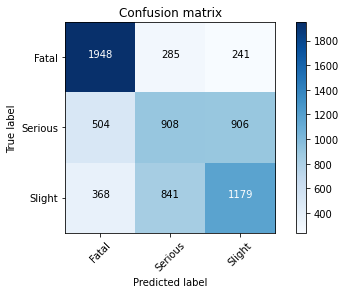

In [154]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat)
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Fatal','Serious','Slight'],normalize= False,  title='Confusion matrix')

# K Nearest Neighbor(KNN)

In [155]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 12
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMtx=[];
for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
print(mean_acc)
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

[0.59 0.58 0.59 0.59 0.58 0.58 0.58 0.57 0.57 0.58 0.57]
The best accuracy was with 0.5940111420612814 with k= 1


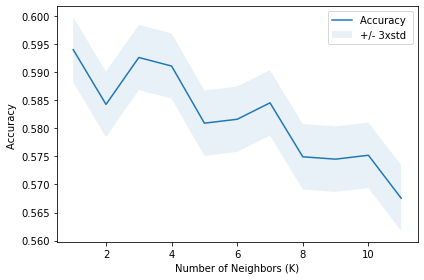

The best accuracy was with 0.5940111420612814 with k= 1


In [156]:
# finding the best K for KNN modelling

plt.plot(range(1,Ks),mean_acc)
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 



In [157]:
# Fitting the model using best K
neigh = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1).fit(X_train, y_train)
yhat = neigh.predict(X_test)
print('sample of predicted values',yhat[0:10])
print('corresponding actual values',y_test[0:10])

sample of predicted values ['Serious' 'Fatal' 'Fatal' 'Slight' 'Slight' 'Serious' 'Slight' 'Fatal'
 'Fatal' 'Fatal']
corresponding actual values ['Serious' 'Slight' 'Fatal' 'Slight' 'Slight' 'Slight' 'Serious' 'Fatal'
 'Fatal' 'Fatal']


Decision Tree

In [158]:
from sklearn.tree import DecisionTreeClassifier
import sklearn
import matplotlib.image as mpimg
from sklearn import tree

modeltree = DecisionTreeClassifier(criterion="entropy")
modeltree.fit(X_train, y_train)

predTree = modeltree.predict(X_test)
print('sample of predicted values',predTree[0:10])
print('corresponding actual values',y_test[0:10])


sample of predicted values ['Serious' 'Fatal' 'Fatal' 'Slight' 'Slight' 'Slight' 'Slight' 'Fatal'
 'Fatal' 'Fatal']
corresponding actual values ['Serious' 'Slight' 'Fatal' 'Slight' 'Slight' 'Slight' 'Serious' 'Fatal'
 'Fatal' 'Fatal']


# LR

In [159]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.01, solver="liblinear").fit(X_train,y_train)

In [160]:
yhat = LR.predict(X_test)
print('sample of predicted values',yhat[0:10])
print('corresponding actual values',y_test[0:10])


sample of predicted values ['Fatal' 'Serious' 'Fatal' 'Slight' 'Slight' 'Slight' 'Slight' 'Slight'
 'Serious' 'Fatal']
corresponding actual values ['Serious' 'Slight' 'Fatal' 'Slight' 'Slight' 'Slight' 'Serious' 'Fatal'
 'Fatal' 'Fatal']


# Comparison and evaluation between different model algorithms

In [161]:
#KNN evaluation
knn_pred=neigh.predict(X_test)
jcknn=jaccard_similarity_score(y_test, knn_pred)
fsknn=f1_score(y_test, knn_pred, average='weighted')

#Decision Tree evaluation
tree_pred=modeltree.predict(X_test)
jcdt=jaccard_similarity_score(y_test, tree_pred)
fsdt=f1_score(y_test, tree_pred, average='weighted')

#SVM evaluation
svm_pred=acc_svm.predict(X_test)
jcsvm=jaccard_similarity_score(y_test, svm_pred)
fssvm=f1_score(y_test, svm_pred, average='weighted')

#Logistic regrission evaluation
log_pred=LR.predict(X_test)
proba=LR.predict_proba(X_test)
jclr=jaccard_similarity_score(y_test, log_pred)
fslr=f1_score(y_test, log_pred, average='weighted')  
lllr=log_loss(y_test, proba)

#build 3 columns
list_jc = [jcknn, jcdt, jcsvm, jclr]
list_fs = [fsknn, fsdt, fssvm, fslr]
list_ll = ['NA', 'NA', 'NA', lllr]



# create report dataframe
df = pd.DataFrame(list_jc, index=['KNN','Decision Tree','SVM','Logistic Regression'])
df.columns = ['Jaccard']
df.insert(loc=1, column='F1-score', value=list_fs)
df.insert(loc=2, column='LogLoss', value=list_ll)
df.columns.name = 'Algorithm'
df

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/me

Algorithm,Jaccard,F1-score,LogLoss
KNN,0.594011,0.585708,NA
Decision Tree,0.638579,0.626617,NA
SVM,0.561978,0.554658,NA
Logistic Regression,0.449304,0.439527,1.03921
